# Opt the opinion after meeting

Time step 0: [100, 100, 5, 5, 0, 0], sum=210
Time step 1: [99.08, 99.08, 5.67, 5.67, 0.25, 0.25], sum=209.99999999999997
Time step 2: [98.05, 98.05, 6.42, 6.42, 0.53, 0.53], sum=209.99999999999994
Time step 3: [96.89, 96.89, 7.26, 7.26, 0.85, 0.85], sum=209.99999999999994
Time step 4: [95.6, 95.6, 8.19, 8.19, 1.22, 1.22], sum=210.0
Time step 5: [94.15, 94.15, 9.22, 9.22, 1.63, 1.63], sum=209.99999999999997
Time step 6: [92.55, 92.55, 10.36, 10.36, 2.09, 2.09], sum=210.0
Time step 7: [90.78, 90.78, 11.61, 11.61, 2.61, 2.61], sum=209.99999999999994
Time step 8: [88.84, 88.84, 12.98, 12.98, 3.19, 3.19], sum=210.0
Time step 9: [86.7, 86.7, 14.46, 14.46, 3.83, 3.83], sum=210.00000000000003
Time step 10: [84.38, 84.38, 16.06, 16.06, 4.56, 4.56], sum=210.0
Time step 11: [81.87, 81.87, 17.77, 17.77, 5.36, 5.36], sum=210.00000000000006
Time step 12: [79.17, 79.17, 19.58, 19.58, 6.25, 6.25], sum=210.00000000000006
Time step 13: [76.28, 76.28, 21.49, 21.49, 7.23, 7.23], sum=210.00000000000006
Tim

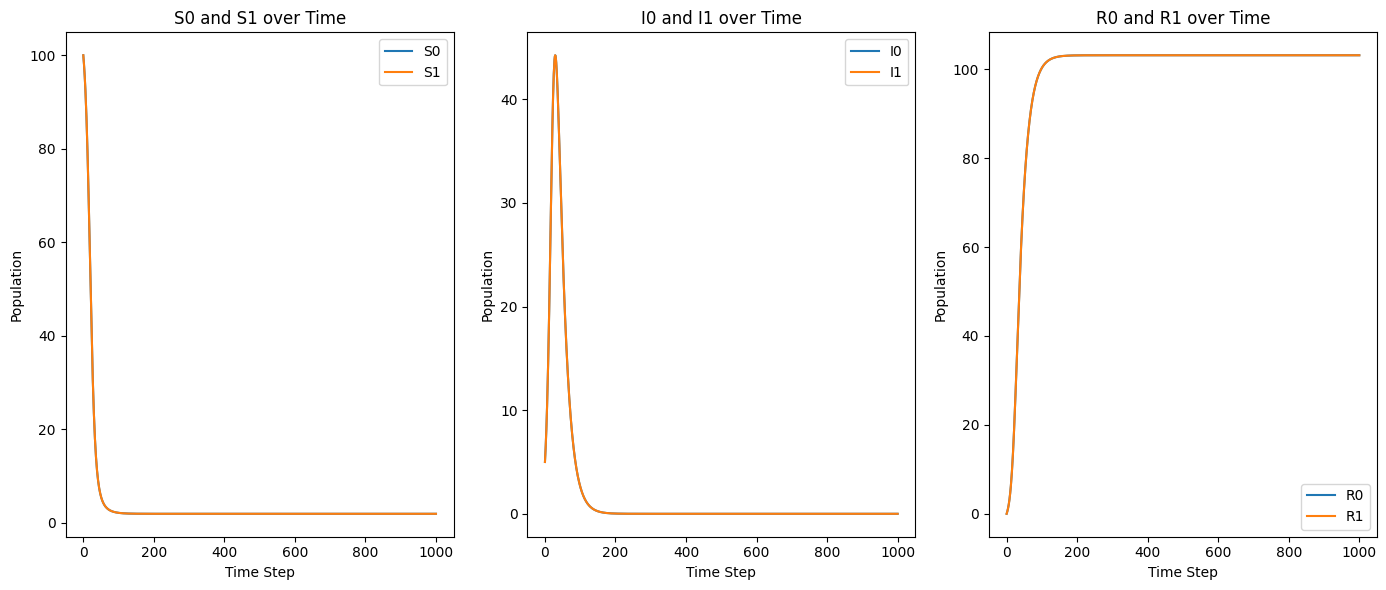

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def pi(q, n):
    # This is basically the softmax function that we are using to compute the probability distribution
    return np.exp(q) / (np.exp(q) + np.exp(n))

def transition_matrix(beta, gamma, statevector):
    # statevector = [s0 s1 i0 i1 r0 r1]

    N = np.sum(statevector)
    ps0 = statevector[0] / N
    ps1 = statevector[1] / N
    pi0 = statevector[2] / N
    pi1 = statevector[3] / N
    pr0 = statevector[4] / N
    pr1 = statevector[5] / N

    matrix = np.zeros((6, 6))
    
    matrix[0, 0] = ps0 + pi0 * (pi(0, 1) * (1-beta) + pi(1, 1)) + pr0  # S0 -> S0
    matrix[0, 1] = ps1 + pi1 * (pi(0, 1) * (1-beta) + pi(1, 1)) + pr1  # S0 -> S1
    matrix[0, 2] = pi0 * pi(0, 1) * beta  # S0 -> I0
    matrix[0, 3] = pi1 * pi(0, 1) * beta  # S0 -> I1

    matrix[1, 0] = ps0 + pi0 * (pi(1, 1) * (1-beta) + pi(1, 1)) + pr0   # S1 -> S0
    matrix[1, 1] = ps1 + pi1 * (pi(1, 1) * (1-beta) + pi(1, 1)) + pr1  # S1 -> S1
    matrix[1, 2] = pi0 * pi(1, 1) * beta  # S1 -> I0
    matrix[1, 3] = pi1 * pi(1, 1) * beta  # S1 -> I1

    matrix[2, 2] = (1-gamma) * (ps0 + pi0 + pr0)  # I0 -> I0
    matrix[2, 3] = (1-gamma) * (ps1 + pi1 + pr1)  # I0 -> I1 
    matrix[2, 4] = gamma  * (ps0 + pi0 + pr0) # I0 -> R0
    matrix[2, 5] = gamma  * (ps1 + pi1 + pr1) # I0 -> R1

    matrix[3, 2] = (1-gamma) * (ps0 + pi0 + pr0)  # I1 -> I0
    matrix[3, 3] = (1-gamma) * (ps1 + pi1 + pr1)  # I1 -> I1 
    matrix[3, 4] = gamma  * (ps0 + pi0 + pr0) # I1 -> R0
    matrix[3, 5] = gamma  * (ps1 + pi1 + pr1) # I1 -> R1

    matrix[4, 4] = ps0 + pi0 + pr0  # R0 -> R0
    matrix[4, 5] = ps1 + pi1 + pr1  # R0 -> R1

    matrix[5, 5] = ps1 + pi1 + pr1  # R1 -> R0
    matrix[5, 4] = ps0 + pi0 + pr0  # R1 -> R1

    # Normalize each row
    matrix = matrix / matrix.sum(axis=1, keepdims=True)

    return matrix

def simulate_transition(population, beta, gamma, steps):
    """Simulate the population transitions over a number of steps."""
    populations = [np.array(population)]
    for _ in range(steps):
        matrix = transition_matrix(beta, gamma, populations[-1])
        population = populations[-1] @ matrix
        populations.append(population)
    return populations

init_state = np.array([100, 100, 5, 5, 0, 0])
beta = 0.5  # Example infection rate
gamma = 0.05  # Example recovery rate
steps = 1000 # Number of time steps to simulate
populations = simulate_transition(init_state, beta, gamma, steps)

# Printing results
for i, pop in enumerate(populations):
    print(f"Time step {i}: {[round(pi,2) for pi in pop]}, sum={np.sum(pop)}")


def plot_results(populations):
    timesteps = len(populations)
    S0 = [pop[0] for pop in populations]
    S1 = [pop[1] for pop in populations]
    I0 = [pop[2] for pop in populations]
    I1 = [pop[3] for pop in populations]
    R0 = [pop[4] for pop in populations]
    R1 = [pop[5] for pop in populations]

    time = np.arange(timesteps)

    plt.figure(figsize=(14, 6))

    # Plot S0 and S1
    plt.subplot(1, 3, 1)
    plt.plot(time, S0, label='S0')
    plt.plot(time, S1, label='S1')
    plt.xlabel('Time Step')
    plt.ylabel('Population')
    plt.title('S0 and S1 over Time')
    plt.legend()

    # Plot I0 and I1
    plt.subplot(1, 3, 2)
    plt.plot(time, I0, label='I0')
    plt.plot(time, I1, label='I1')
    plt.xlabel('Time Step')
    plt.ylabel('Population')
    plt.title('I0 and I1 over Time')
    plt.legend()

    # Plot R0 and R1
    plt.subplot(1, 3, 3)
    plt.plot(time, R0, label='R0')
    plt.plot(time, R1, label='R1')
    plt.xlabel('Time Step')
    plt.ylabel('Population')
    plt.title('R0 and R1 over Time')
    plt.legend()

    plt.tight_layout()
    plt.show()

    
plot_results(populations)



# Dominance Model, when if other opinion is higher then one would opt it

Time step 0: [100, 100, 5, 5, 0, 0], sum=210
Time step 1: [49.68, 148.49, 2.7, 8.64, 0.12, 0.38], sum=209.99999999999997
Time step 2: [12.34, 183.45, 0.73, 12.41, 0.06, 1.0], sum=210.0
Time step 3: [0.77, 192.05, 0.05, 15.41, 0.01, 1.72], sum=209.99999999999997
Time step 4: [0.0, 189.27, 0.0, 18.23, 0.0, 2.5], sum=210.0
Time step 5: [0.0, 185.17, 0.0, 21.42, 0.0, 3.41], sum=210.0
Time step 6: [0.0, 180.45, 0.0, 25.07, 0.0, 4.48], sum=210.0
Time step 7: [0.0, 175.06, 0.0, 29.21, 0.0, 5.73], sum=210.0
Time step 8: [0.0, 168.97, 0.0, 33.83, 0.0, 7.19], sum=210.0
Time step 9: [0.0, 162.17, 0.0, 38.95, 0.0, 8.89], sum=210.00000000000006
Time step 10: [0.0, 154.65, 0.0, 44.52, 0.0, 10.83], sum=210.00000000000003
Time step 11: [0.0, 146.45, 0.0, 50.49, 0.0, 13.06], sum=210.00000000000003
Time step 12: [0.0, 137.65, 0.0, 56.77, 0.0, 15.58], sum=210.00000000000003
Time step 13: [0.0, 128.35, 0.0, 63.23, 0.0, 18.42], sum=210.00000000000003
Time step 14: [0.0, 118.68, 0.0, 69.73, 0.0, 21.58], sum

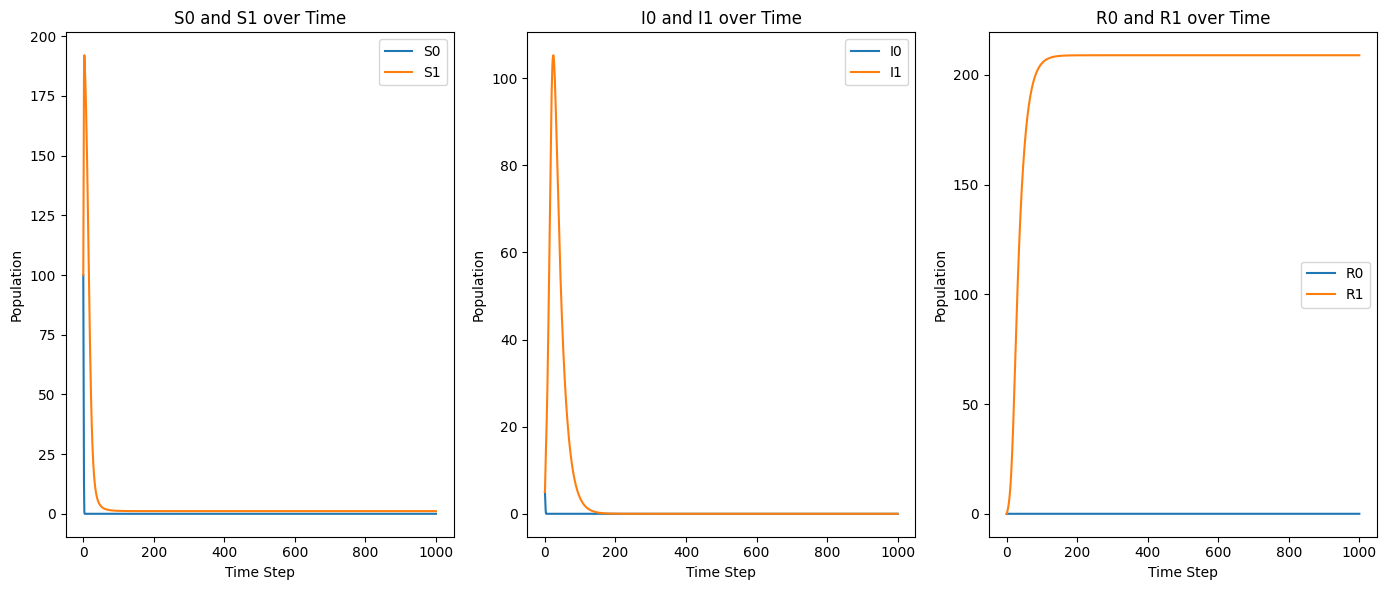

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def pi(q, n):
    # This is basically the softmax function that we are using to compute the probability distribution
    return np.exp(q) / (np.exp(q) + np.exp(n))

def transition_matrix(beta, gamma, statevector):
    # statevector = [s0 s1 i0 i1 r0 r1]

    N = np.sum(statevector)
    ps0 = statevector[0] / N
    ps1 = statevector[1] / N
    pi0 = statevector[2] / N
    pi1 = statevector[3] / N
    pr0 = statevector[4] / N
    pr1 = statevector[5] / N

    matrix = np.zeros((6, 6))
    
    matrix[0, 0] = ps0 + pi0 * (pi(0, 1) * (1-beta) + pi(1, 1)) + pr0  # S0 -> S0
    matrix[0, 1] = ps1 + pi1 * (pi(0, 1) * (1-beta) + pi(1, 1)) + pr1  # S0 -> S1
    matrix[0, 2] = pi0 * pi(0, 1) * beta  # S0 -> I0
    matrix[0, 3] = pi1 * pi(0, 1) * beta  # S0 -> I1

    
    matrix[1, 1] = ps1 + pi1 * (pi(1, 1) * (1-beta) + pi(1, 1)) + pr1 + ps0 + pi0 * (pi(1, 1) * (1-beta) + pi(1, 1)) + pr0 # S1 -> S1
    matrix[1, 3] = pi1 * pi(1, 1) * beta + pi0 * pi(1, 1) * beta  # S1 -> I1

    matrix[2, 2] = (1-gamma) * (ps0 + pi0 + pr0)  # I0 -> I0
    matrix[2, 3] = (1-gamma) * (ps1 + pi1 + pr1)  # I0 -> I1 
    matrix[2, 4] = gamma  * (ps0 + pi0 + pr0) # I0 -> R0
    matrix[2, 5] = gamma  * (ps1 + pi1 + pr1) # I0 -> R1

    
    matrix[3, 3] = (1-gamma) * (ps1 + pi1 + pr1) + (1-gamma) * (ps0 + pi0 + pr0) # I1 -> I1 
    matrix[3, 5] = gamma  * (ps1 + pi1 + pr1) + gamma  * (ps0 + pi0 + pr0) # I1 -> R1

    matrix[4, 4] = ps0 + pi0 + pr0  # R0 -> R0
    matrix[4, 5] = ps1 + pi1 + pr1  # R0 -> R1

    matrix[5, 5] = ps1 + pi1 + pr1 + ps0 + pi0 + pr0 # R1 -> R0
    

    # Normalize each row
    matrix = matrix / matrix.sum(axis=1, keepdims=True)

    return matrix

def simulate_transition(population, beta, gamma, steps):
    """Simulate the population transitions over a number of steps."""
    populations = [np.array(population)]
    for _ in range(steps):
        matrix = transition_matrix(beta, gamma, populations[-1])
        population = populations[-1] @ matrix
        populations.append(population)
    return populations

init_state = np.array([100, 100, 5, 5, 0, 0])
beta = 0.5  # Example infection rate
gamma = 0.05  # Example recovery rate
steps = 1000 # Number of time steps to simulate
populations = simulate_transition(init_state, beta, gamma, steps)

# Printing results
for i, pop in enumerate(populations):
    print(f"Time step {i}: {[round(pi,2) for pi in pop]}, sum={np.sum(pop)}")


def plot_results(populations):
    timesteps = len(populations)
    S0 = [pop[0] for pop in populations]
    S1 = [pop[1] for pop in populations]
    I0 = [pop[2] for pop in populations]
    I1 = [pop[3] for pop in populations]
    R0 = [pop[4] for pop in populations]
    R1 = [pop[5] for pop in populations]

    time = np.arange(timesteps)

    plt.figure(figsize=(14, 6))

    # Plot S0 and S1
    plt.subplot(1, 3, 1)
    plt.plot(time, S0, label='S0')
    plt.plot(time, S1, label='S1')
    plt.xlabel('Time Step')
    plt.ylabel('Population')
    plt.title('S0 and S1 over Time')
    plt.legend()

    # Plot I0 and I1
    plt.subplot(1, 3, 2)
    plt.plot(time, I0, label='I0')
    plt.plot(time, I1, label='I1')
    plt.xlabel('Time Step')
    plt.ylabel('Population')
    plt.title('I0 and I1 over Time')
    plt.legend()

    # Plot R0 and R1
    plt.subplot(1, 3, 3)
    plt.plot(time, R0, label='R0')
    plt.plot(time, R1, label='R1')
    plt.xlabel('Time Step')
    plt.ylabel('Population')
    plt.title('R0 and R1 over Time')
    plt.legend()

    plt.tight_layout()
    plt.show()

    
plot_results(populations)



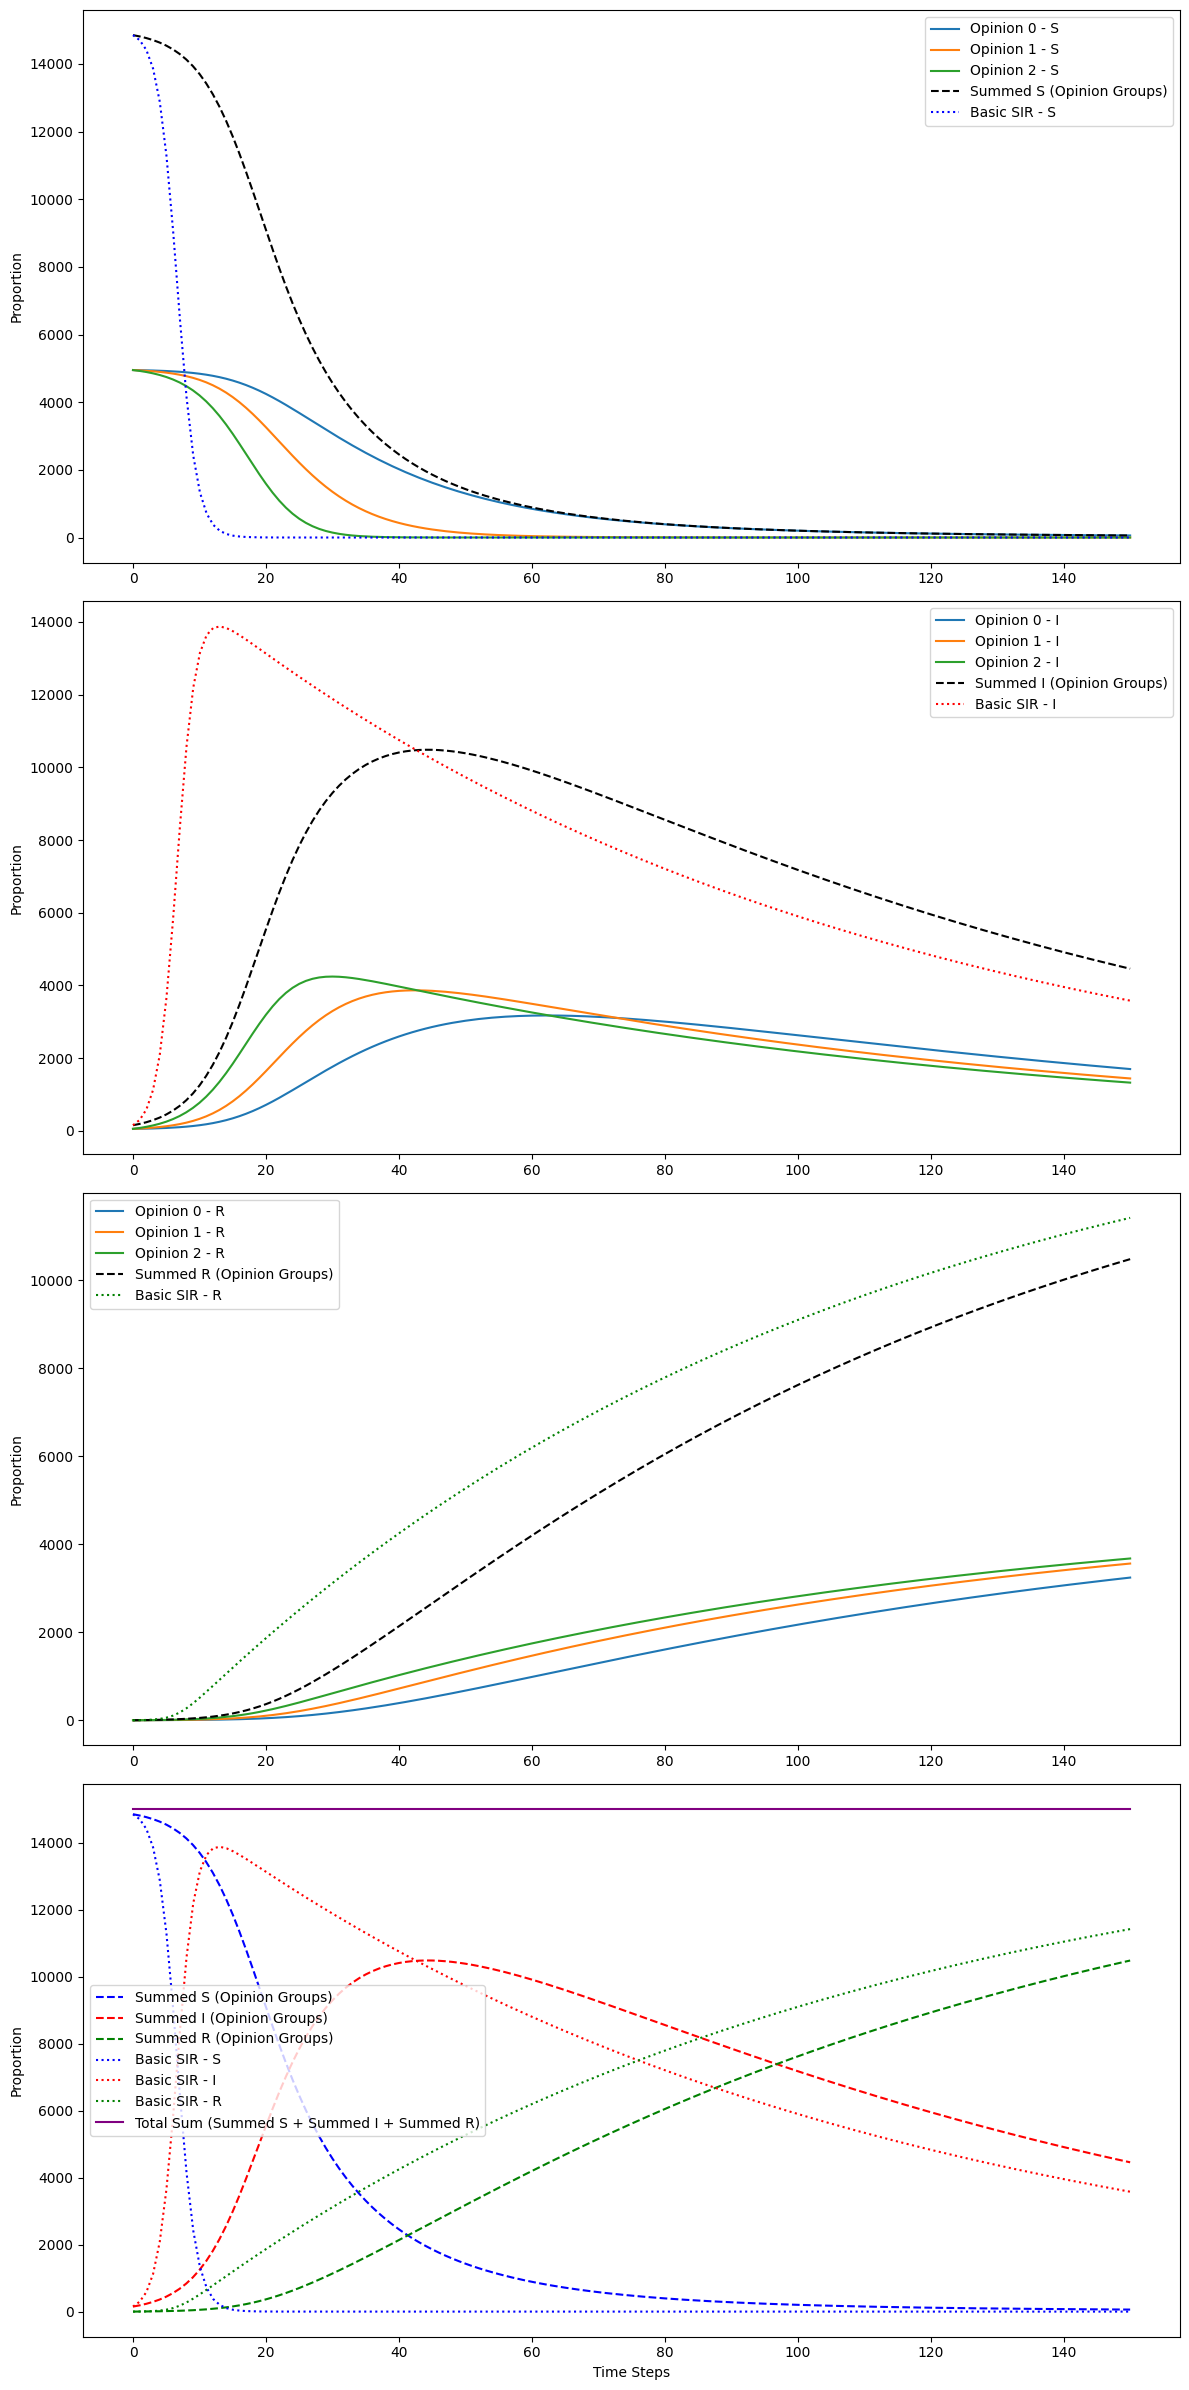

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp

# Basic SIR model parameters and initial values
N = 15000
int_I = 0.01 * N
int_R = 0
int_S = N - int_I - int_R  # S_0 is starting susceptible
beta = 0.7
gamma = 0.01
MaxTime = 150
RunTime = np.linspace(0, MaxTime, MaxTime)

# Define the system of differential equations for the basic SIR model
def Basic_SIR(y, RunTime, N, beta, gamma):
    int_S, int_I, int_R = y
    dsdt = -beta * int_S * int_I / N
    didt = (beta * int_S * int_I / N) - (gamma * int_I)
    drdt = gamma * int_I
    return dsdt, didt, drdt

# Initial conditions for the basic SIR model
y_0 = int_S, int_I, int_R

# Integrate the system of differential equations for the basic SIR model
coord = odeint(Basic_SIR, y_0, RunTime, args=(N, beta, gamma))
basic_S, basic_I, basic_R = coord.T

# Number of opinion groups (indexed from 0 to n), which can be changed accordingly if needed
n = 2  # The total number of opinion groups

# Below is the function to calculate the probability distribution over the opinions
def pi(q, n):
    # This is basically the softmax function that we are using to compute the probability distribution
    return np.exp(q) / np.sum(np.exp(np.arange(n + 1)))

# Initialization of initial values for all the S, I, R in each opinion group
initial_values = {f'P_S_{i}': float(int_S / (n + 1)) for i in range(n + 1)}
initial_values.update({f'P_I_{i}': float(int_I / (n + 1)) for i in range(n + 1)})
initial_values.update({f'P_R_{i}': float(int_R / (n + 1)) for i in range(n + 1)})

# Combined ODEs for the SIR model with opinions
def sir_model_with_opinions(t, y, beta, gamma, N, n):
    # Unpack the current values of S, I, and R for each opinion group from y
    S = y[:n+1]
    I = y[n+1:2*(n+1)]
    R = y[2*(n+1):]
    
    # Initialize derivatives
    dSdt = np.zeros(n+1)
    dIdt = np.zeros(n+1)
    dRdt = np.zeros(n+1)
    
    # Compute the sum of all infected individuals across all opinion groups
    total_infected = np.sum(I)
    
    for O in range(n+1):
        # Calculate the changes, ensuring they don't exceed the total population
        dSdt[O] = -pi(O, n) * beta * S[O] * total_infected / N
        dIdt[O] = pi(O, n) * beta * S[O] * total_infected / N - gamma * I[O]
        dRdt[O] = gamma * I[O]
        
    # Combine derivatives into a single array
    dydt = np.concatenate([dSdt, dIdt, dRdt])
    return dydt

# Example usage of solve_ivp
def solve_sir_model_with_opinions(beta, gamma, N, n, y0, t_span):
    # Solve the ODEs
    sol = solve_ivp(sir_model_with_opinions, t_span, y0, args=(beta, gamma, N, n), t_eval=np.arange(t_span[0], t_span[1]+1))
    return sol

# Initial conditions for the opinion groups SIR model
y0_opinions = np.array([initial_values[f'P_S_{i}'] for i in range(n + 1)] +
                       [initial_values[f'P_I_{i}'] for i in range(n + 1)] +
                       [initial_values[f'P_R_{i}'] for i in range(n + 1)])

# Solve the opinion groups SIR model
t_span = (0, MaxTime)
solution = solve_sir_model_with_opinions(beta, gamma, N, n, y0_opinions, t_span)

# Extract the results
time_points = solution.t
S_opinion = solution.y[:n+1]
I_opinion = solution.y[n+1:2*(n+1)]
R_opinion = solution.y[2*(n+1):]

# Combine the results into a DataFrame
columns = [f'P_S_{i}' for i in range(n + 1)] + [f'P_I_{i}' for i in range(n + 1)] + [f'P_R_{i}' for i in range(n + 1)]
data_opinions = pd.DataFrame(np.vstack([S_opinion, I_opinion, R_opinion]).T, columns=columns, index=time_points)

import matplotlib.pyplot as plt

# Combined function to plot the simulation results and ensure total population constraint
def plot_simulation_2d(data, basic_S, basic_I, basic_R, RunTime, n, N):
    num_plots = n + 1  # Total number of opinion groups
    fig, axes = plt.subplots(4, 1, figsize=(12, 24))

    # Plot S, I, R for each opinion group
    for i in range(num_plots):
        axes[0].plot(data.index, data[f'P_S_{i}'], label=f'Opinion {i} - S')
        axes[1].plot(data.index, data[f'P_I_{i}'], label=f'Opinion {i} - I')
        axes[2].plot(data.index, data[f'P_R_{i}'], label=f'Opinion {i} - R')

    # Plot summed proportions for opinion groups SIR
    summed_S = data[[f'P_S_{i}' for i in range(num_plots)]].sum(axis=1)
    summed_I = data[[f'P_I_{i}' for i in range(num_plots)]].sum(axis=1)
    summed_R = data[[f'P_R_{i}' for i in range(num_plots)]].sum(axis=1)

    axes[0].plot(data.index, summed_S, label='Summed S (Opinion Groups)', color='black', linestyle='--')
    axes[1].plot(data.index, summed_I, label='Summed I (Opinion Groups)', color='black', linestyle='--')
    axes[2].plot(data.index, summed_R, label='Summed R (Opinion Groups)', color='black', linestyle='--')

    # Plot basic SIR model results
    axes[0].plot(RunTime, basic_S, label='Basic SIR - S', color='blue', linestyle=':')
    axes[1].plot(RunTime, basic_I, label='Basic SIR - I', color='red', linestyle=':')
    axes[2].plot(RunTime, basic_R, label='Basic SIR - R', color='green', linestyle=':')

    # Set labels and legend for individual plots
    for i in range(3):
        axes[i].set_ylabel('Proportion')
        axes[i].legend()

    # Plot summed SIR proportions separately
    axes[3].plot(data.index, summed_S, label='Summed S (Opinion Groups)', color='blue', linestyle='--')
    axes[3].plot(data.index, summed_I, label='Summed I (Opinion Groups)', color='red', linestyle='--')
    axes[3].plot(data.index, summed_R, label='Summed R (Opinion Groups)', color='green', linestyle='--')
    axes[3].plot(RunTime, basic_S, label='Basic SIR - S', color='blue', linestyle=':')
    axes[3].plot(RunTime, basic_I, label='Basic SIR - I', color='red', linestyle=':')
    axes[3].plot(RunTime, basic_R, label='Basic SIR - R', color='green', linestyle=':')

    # Calculate and plot the total sum of S, I, and R to ensure it equals the total population
    total_sum_opinion = summed_S + summed_I + summed_R
    axes[3].plot(data.index, total_sum_opinion, label='Total Sum (Summed S + Summed I + Summed R)', color='purple', linestyle='-')

    axes[3].set_xlabel('Time Steps')
    axes[3].set_ylabel('Proportion')
    axes[3].legend()

    plt.tight_layout()
    plt.show()

plot_simulation_2d(data_opinions, basic_S, basic_I, basic_R, RunTime, n, N)



In [ ]:
S_sum_WO_O = sum(S) - S[O]
I_sum_WO_O = sum(I) - I[O]
R_sum_WO_O = sum(R) - R[O]

SIR_O_sum = S[O] + I[O] + R[O]
S_pi_sum_WO_O = sum([S[i] * pi(i, n) for i in range(n+1) if i != O]) - S[O] * pi(O, n)
dSdt[O] = -pi(O, n) * beta * S[O] * I[O]- S[O] * (pi(O, n) + pi(n, n)) * I_sum_WO_O + (R[O] - S[O]) * R_sum_WO_O + I[O] * ((1-beta) * S_pi_sum_WO_O + pi(n, n) * S_sum_WO_O )
dIdt[O] =  beta * I[O] * (S_pi_sum_WO_O + S[O] * pi(O, n) ) + (1-gamma) * SIR_O_sum * I_sum_WO_O -  gamma * I[O] * SIR_O_sum - I[O] *(S_sum_WO_O + I_sum_WO_O + R_sum_WO_O)
dRdt[O] = gamma * (I_sum_WO_O + I[O] + (R_sum_WO_O/gamma)) * SIR_O_sum - R[O] * (S_sum_WO_O + I_sum_WO_O + R_sum_WO_O)

In [ ]:
dS1dt =  -S1*S2 - S1*R2- S1*I1*beta*pi(1,2) - S1*I2*beta*pi(1,2) - S1*I2*pi(2,2) + S2*I1*(1-beta)*pi(2,2)+ S1*S2 + S2*R1
dS2dt =  -S2*S1 - S2*R1- S2*I1*beta*pi(2,2) - S2*I2*beta*pi(2,2) - S2*I1*pi(1,2) + S1*I2*(1-beta)*pi(1,2)+ S1*S2 + S1*R2
    
dI1dt = -I1*S1*gamma - I1*S2*gamma - I1*S2*(1-gamma) - I1*I1*gamma - I1*I2*gamma - I1*I2*(1-gamma) - I1*R1*gamma - I1*R2*gamma - I1*R2*(1-gamma) + I2*S1*(1-gamma) + I2*I1*(1-gamma) + I2*R1*(1-gamma) + S1*I1*beta*pi(1,2) + S2*I1*beta*pi(2,2)
dI2dt = -I2*S1*gamma - I2*S2*gamma - I2*S1*(1-gamma) - I2*I1*gamma - I2*I1*(1-gamma) - I2*I2*gamma - I2*R1*gamma - I2*R2*gamma - I2*R1*(1-gamma) + I1*S2*(1-gamma) + I1*I2*(1-gamma) + I1*R2*(1-gamma) + S1*I2*beta*pi(1,2) + S2*I2*beta*pi(2,2)
    
dR1dt = -R1*S2 - R1*I2 - R1*R2 + R2*S1 + R2*I1 + R2*R1 + I1*S1*gamma + I1*I1*gamma + I1*R1*gamma + I2*S1*gamma + I2*I1*gamma + I2*R1*gamma
dR2dt = -R2*S1 - R2*I1 - R2*R1 + R1*S2 + R1*I2 + R1*R2 + I1*S2*gamma + I1*I2*gamma + I1*R2*gamma + I2*S2*gamma + I2*I2*gamma + I2*R2*gamma
    

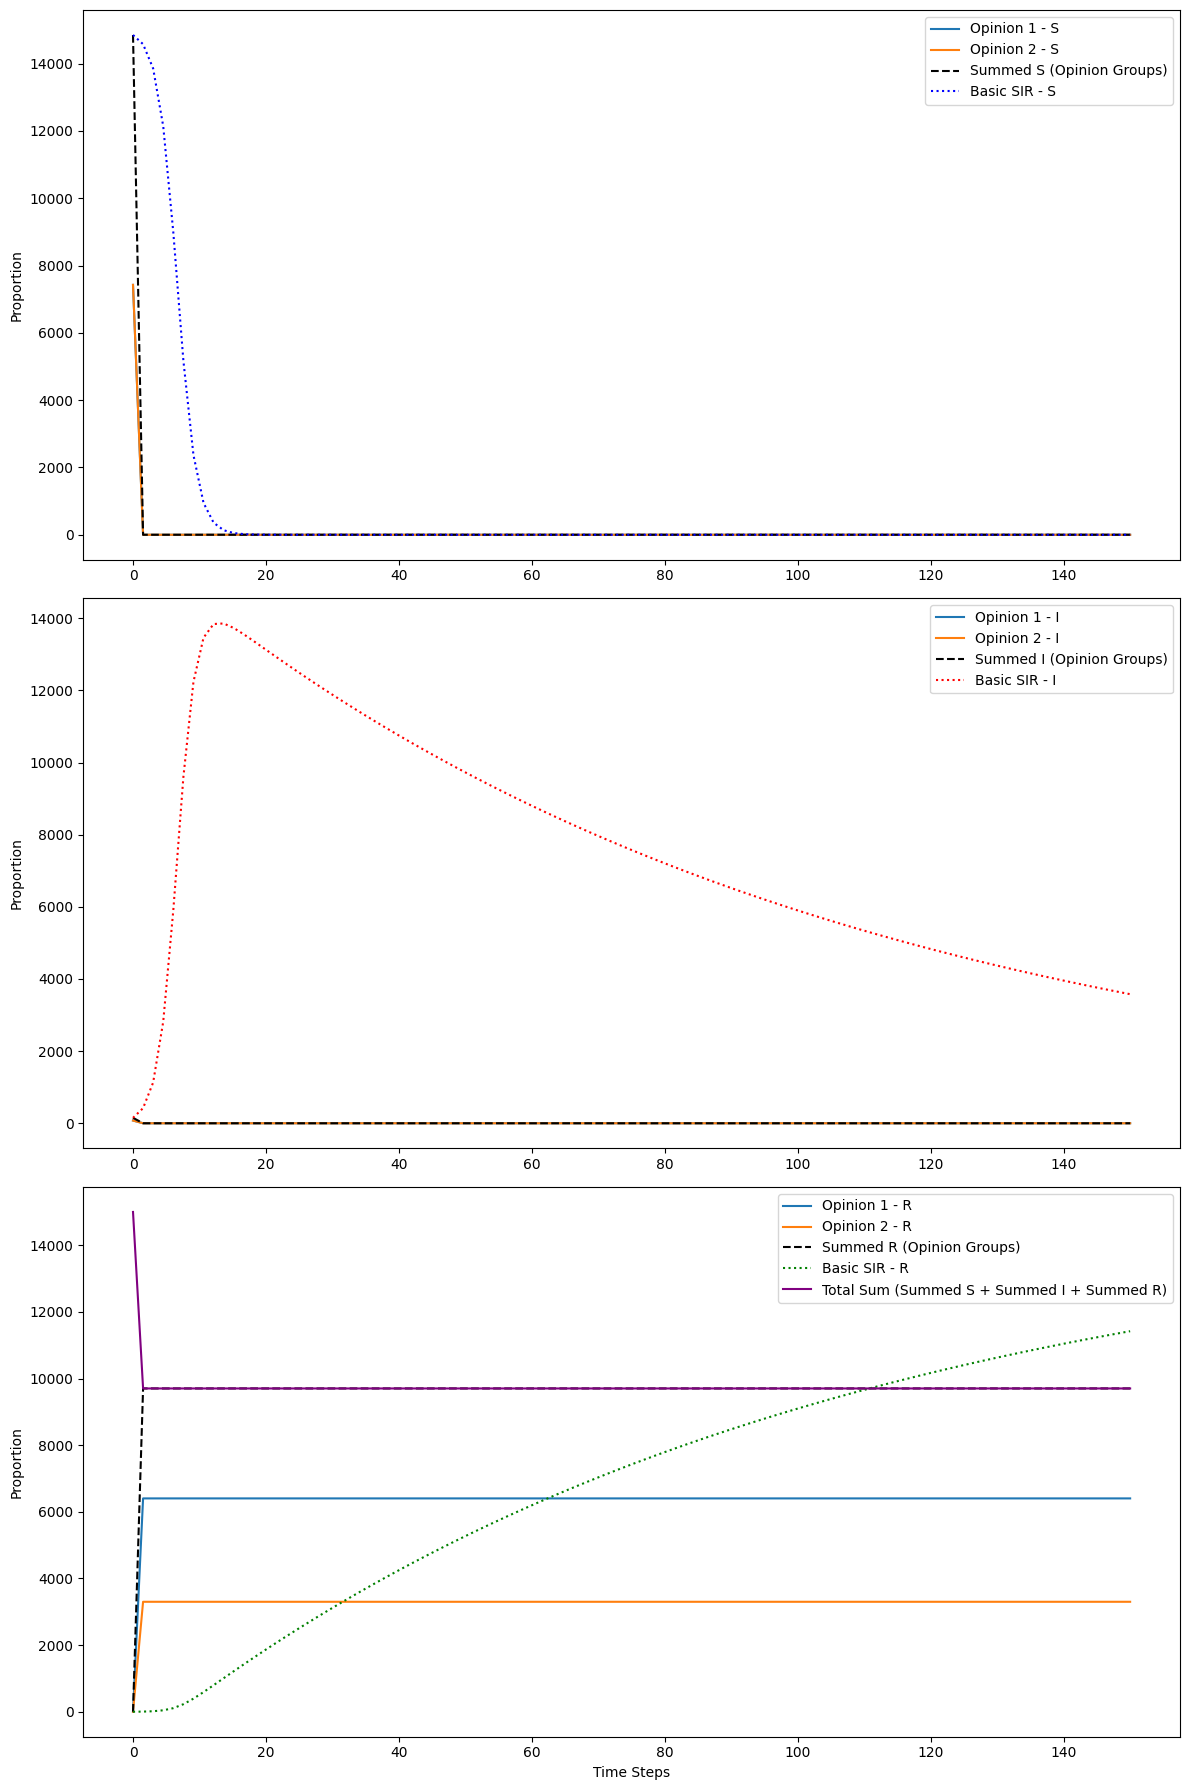

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Basic SIR model parameters and initial values
N = 15000
int_I = 0.01 * N
int_R = 0
int_S = N - int_I - int_R  # S_0 is starting susceptible
beta = 0.7
gamma = 0.01
MaxTime = 150

# Number of opinion groups
n = 2

# Precompute the pi values
pi_values = {q: np.exp(q) / np.sum(np.exp(np.arange(n + 1))) for q in range(n + 1)}

def pi(q, n):
    return pi_values[q]

# Define the system of differential equations for the SIR model with two opinion groups
def sir_model_with_opinions(t, y, beta, gamma, N):
    S1, S2, I1, I2, R1, R2 = y
    
    dS1dt = -S1*S2 - S1*R2 - S1*I1*beta*pi(1, n) - S1*I2*beta*pi(1, n) - S1*I2*pi(2, n) + S2*I1*(1-beta)*pi(2, n) + S1*S2 + S2*R1
    dS2dt = -S2*S1 - S2*R1 - S2*I1*beta*pi(2, n) - S2*I2*beta*pi(2, n) - S2*I1*pi(1, n) + S1*I2*(1-beta)*pi(1, n) + S1*S2 + S1*R2
    
    dI1dt = -I1*S1*gamma - I1*S2*gamma - I1*S2*(1-gamma) - I1*I1*gamma - I1*I2*gamma - I1*I2*(1-gamma) - I1*R1*gamma - I1*R2*gamma - I1*R2*(1-gamma) + I2*S1*(1-gamma) + I2*I1*(1-gamma) + I2*R1*(1-gamma) + S1*I1*beta*pi(1, n) + S2*I1*beta*pi(2, n)
    dI2dt = -I2*S1*gamma - I2*S2*gamma - I2*S1*(1-gamma) - I2*I1*gamma - I2*I1*(1-gamma) - I2*I2*gamma - I2*R1*gamma - I2*R2*gamma - I2*R1*(1-gamma) + I1*S2*(1-gamma) + I1*I2*(1-gamma) + I1*R2*(1-gamma) + S1*I2*beta*pi(1, n) + S2*I2*beta*pi(2, n)
    
    dR1dt = -R1*S2 - R1*I2 - R1*R2 + R2*S1 + R2*I1 + R2*R1 + I1*S1*gamma + I1*I1*gamma + I1*R1*gamma + I2*S1*gamma + I2*I1*gamma + I2*R1*gamma
    dR2dt = -R2*S1 - R2*I1 - R2*R1 + R1*S2 + R1*I2 + R1*R2 + I1*S2*gamma + I1*I2*gamma + I1*R2*gamma + I2*S2*gamma + I2*I2*gamma + I2*R2*gamma

    return [dS1dt, dS2dt, dI1dt, dI2dt, dR1dt, dR2dt]

# Initial conditions for the opinion groups SIR model
S1_0 = int_S / 2
S2_0 = int_S / 2
I1_0 = int_I / 2
I2_0 = int_I / 2
R1_0 = int_R / 2
R2_0 = int_R / 2

y0_opinions = [S1_0, S2_0, I1_0, I2_0, R1_0, R2_0]

# Solve the opinion groups SIR model
t_span = (0, MaxTime)
t_eval = np.linspace(t_span[0], t_span[1], 100)  # Reduced number of time steps for faster computation
solution = solve_ivp(sir_model_with_opinions, t_span, y0_opinions, args=(beta, gamma, N), t_eval=t_eval)

# Extract the results
time_points = solution.t
S1, S2, I1, I2, R1, R2 = solution.y

# Combine the results into a DataFrame
data_opinions = pd.DataFrame({
    'time': time_points,
    'S1': S1,
    'S2': S2,
    'I1': I1,
    'I2': I2,
    'R1': R1,
    'R2': R2
})

# Function to plot the simulation results
def plot_simulation_2d(data, basic_S, basic_I, basic_R, RunTime, n, N):
    fig, axes = plt.subplots(3, 1, figsize=(12, 18))

    # Plot S, I, R for each opinion group
    axes[0].plot(data['time'], data['S1'], label='Opinion 1 - S')
    axes[0].plot(data['time'], data['S2'], label='Opinion 2 - S')
    axes[1].plot(data['time'], data['I1'], label='Opinion 1 - I')
    axes[1].plot(data['time'], data['I2'], label='Opinion 2 - I')
    axes[2].plot(data['time'], data['R1'], label='Opinion 1 - R')
    axes[2].plot(data['time'], data['R2'], label='Opinion 2 - R')

    # Plot summed proportions for opinion groups SIR
    summed_S = data[['S1', 'S2']].sum(axis=1)
    summed_I = data[['I1', 'I2']].sum(axis=1)
    summed_R = data[['R1', 'R2']].sum(axis=1)

    axes[0].plot(data['time'], summed_S, label='Summed S (Opinion Groups)', color='black', linestyle='--')
    axes[1].plot(data['time'], summed_I, label='Summed I (Opinion Groups)', color='black', linestyle='--')
    axes[2].plot(data['time'], summed_R, label='Summed R (Opinion Groups)', color='black', linestyle='--')

    # Plot basic SIR model results
    axes[0].plot(RunTime, basic_S, label='Basic SIR - S', color='blue', linestyle=':')
    axes[1].plot(RunTime, basic_I, label='Basic SIR - I', color='red', linestyle=':')
    axes[2].plot(RunTime, basic_R, label='Basic SIR - R', color='green', linestyle=':')

    # Set labels and legend for individual plots
    for i in range(3):
        axes[i].set_ylabel('Proportion')
        axes[i].legend()

    # Calculate and plot the total sum of S, I, and R to ensure it equals the total population
    total_sum_opinion = summed_S + summed_I + summed_R
    axes[2].plot(data['time'], total_sum_opinion, label='Total Sum (Summed S + Summed I + Summed R)', color='purple', linestyle='-')

    axes[2].set_xlabel('Time Steps')
    axes[2].set_ylabel('Proportion')
    axes[2].legend()

    plt.tight_layout()
    plt.show()

# Integrate the basic SIR model
def Basic_SIR(t, y, N, beta, gamma):
    int_S, int_I, int_R = y
    dsdt = -beta * int_S * int_I / N
    didt = beta * int_S * int_I / N - gamma * int_I
    drdt = gamma * int_I
    return dsdt, didt, drdt

y_0 = int_S, int_I, int_R
RunTime = np.linspace(0, MaxTime, 100)  # Reduced number of time steps for faster computation
coord = solve_ivp(Basic_SIR, [0, MaxTime], y_0, args=(N, beta, gamma), t_eval=RunTime)
basic_S, basic_I, basic_R = coord.y

plot_simulation_2d(data_opinions, basic_S, basic_I, basic_R, RunTime, n, N)
